In [39]:
# Importing the libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE,  SelectKBest, f_regression, f_classif, mutual_info_classif, chi2, VarianceThreshold
from sklearn.linear_model import LogisticRegression , LinearRegression, Ridge # Replace with your model
import pandas as pd
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # or any other estimator
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



In [3]:
#Importing source data and storing in a data frame

# Specify the directory where your CSV files are located
csv_directory = 'C:/Users/ayush/OneDrive/Documents/University Study/Projects/NSE Analysis/SourceFiles/v1'

csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames and file names
nse_dataset = []

# Loop through each CSV file and read its data into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    data = pd.read_csv(file_path)
    
    # Add a new column 'FileName' with the current file name
    data['FileName'] = file
    
    # Append the DataFrame to the list
    nse_dataset.append(data)

# Concatenate all DataFrames in the list into a single DataFrame
combined_data = pd.concat(nse_dataset, ignore_index=True)


In [4]:
print(combined_data.describe())

               Open          High           Low         Close        Volume  \
count  6.448178e+06  6.448178e+06  6.448178e+06  6.448178e+06  6.448184e+06   
mean   3.377860e+02  3.436463e+02  3.315765e+02  3.370273e+02  1.299521e+06   
std    2.182294e+03  2.212026e+03  2.147042e+03  2.175901e+03  1.036402e+07   
min   -7.713780e+02 -8.004654e+02 -7.241311e+02 -7.627000e+02  0.000000e+00   
25%    1.945434e+01  1.995000e+01  1.898416e+01  1.938680e+01  7.129000e+03   
50%    6.288477e+01  6.435000e+01  6.133605e+01  6.264981e+01  5.011000e+04   
75%    2.032474e+02  2.077864e+02  1.987080e+02  2.027422e+02  3.323882e+05   
max    1.223432e+05  1.272878e+05  1.212177e+05  1.218266e+05  4.097564e+09   

          Dividends  Stock Splits  Capital Gains  
count  6.448184e+06  6.448184e+06        46843.0  
mean   1.477547e-02  6.937175e-04            0.0  
std    1.956132e+00  6.273903e-02            0.0  
min    0.000000e+00  0.000000e+00            0.0  
25%    0.000000e+00  0.000000e+00

In [5]:
# Data Pre Processing - Finding null values
combined_data.isnull().sum()

Date                   0
Open                   6
High                   6
Low                    6
Close                  6
Volume                 0
Dividends              0
Stock Splits           0
FileName               0
Capital Gains    6401341
dtype: int64

In [6]:
# Data cleaning - Replacing null values with mean values
combined_data["Open"] = combined_data["Open"].replace(np.NaN, combined_data["Open"].mean())
combined_data["High"] = combined_data["High"].replace(np.NaN, combined_data["High"].mean())
combined_data["Low"] = combined_data["Low"].replace(np.NaN, combined_data["Low"].mean())
combined_data["Close"] = combined_data["Close"].replace(np.NaN, combined_data["Close"].mean())
combined_data["Capital Gains"] = combined_data["Capital Gains"].replace(np.NaN, combined_data["Capital Gains"].mean())


In [7]:
print(combined_data.head())

                        Date       Open       High        Low      Close  \
0  2008-10-06 00:00:00+05:30  35.138197  35.138197  13.879588  14.736081   
1  2008-10-07 00:00:00+05:30  14.055279  16.690643  12.232485  13.198785   
2  2008-10-08 00:00:00+05:30  12.298368  12.825442  11.024609  11.639527   
3  2008-10-10 00:00:00+05:30  10.936764  10.936764   9.509275  10.190078   
4  2008-10-13 00:00:00+05:30  10.673226  11.683450  10.233999  10.826956   

     Volume  Dividends  Stock Splits          FileName  Capital Gains  
0  23501600        0.0           0.0  20MICRONS.NS.csv            0.0  
1   9113400        0.0           0.0  20MICRONS.NS.csv            0.0  
2   2464384        0.0           0.0  20MICRONS.NS.csv            0.0  
3   1207928        0.0           0.0  20MICRONS.NS.csv            0.0  
4    898692        0.0           0.0  20MICRONS.NS.csv            0.0  


In [9]:
# Seoarating the date time vakue into Separate Date, Month, Year and Hour columns
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format="%Y-%m-%d %H:%M:%S%z", errors='coerce')

# Extract relevant datetime features
combined_data['Year'] = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month
combined_data['Day'] = combined_data['Date'].dt.day
combined_data['Hour'] = combined_data['Date'].dt.hour
#combined_data['Minute'] = combined_data['Date'].dt.minute
#combined_data['Second'] = combined_data['Date'].dt.second


In [10]:
# Drop the original datetime column
combined_data = combined_data.drop(columns=['Date'])


In [11]:
#Drop the NaN values
cleaned_data = combined_data.dropna()

In [12]:
#Separate the feature and target variables
x = combined_data[['Open','High','Low','Volume','Dividends','Stock Splits','Capital Gains','Year','Month','Day','Hour']].values
y = combined_data[['Close']].values

In [13]:
#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=100)

In [14]:
#selector = RFE(estimator=LogisticRegression(), n_features_to_select=5)  # Adjust 'n_features_to_select' as needed
#X_selected = selector.fit_transform(x, y)

imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', 'most_frequent', etc.

# Impute missing values
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_imputed)
X_test_scaled = scaler.transform(x_test_imputed)

k_best_selector = VarianceThreshold(threshold=0.1)
X_train_selected = k_best_selector.fit_transform(x_train_imputed, y_train)
X_test_selected = k_best_selector.transform(x_test_imputed)

# Get the indices of the selected features
selected_feature_indices = k_best_selector.get_support(indices=True)

print("Indices of selected features:", selected_feature_indices)

Indices of selected features: [0 1 2 3 4 7 8 9]


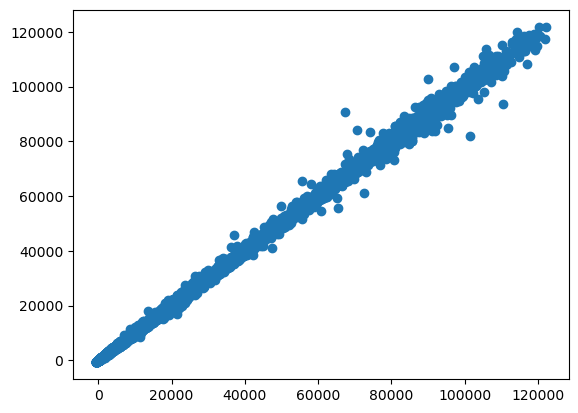

In [36]:
# Checking the assumptions for Linear Regression

# Assumption : Linear relationship between Dependent and Independent Variable

# scatter plot with linear trend between father and children height
plt.scatter(x[:,0],y)
slope, intercept = np.polyfit(x[:,0],y, 1)
plt.plot(x[:,0], slope * x[:,0] + intercept)
plt.show()

In [15]:
# Linear Regression Model

linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train_selected, y_train)

LinearRegression()

In [16]:
# Prediction on x_test_selected data
linearRegression_y_pred = linearRegressionModel.predict(X_test_selected)

In [17]:
# Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, linearRegression_y_pred)
print("Mean Absolute Error (MAE) for Linear Regression:", mae_lr)


# Mean Absolute Percentage Error (MAPE)
mape_lr = np.mean(np.abs((y_test - linearRegression_y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE) for Linear Regression:", mape_lr)

# R-squared (R2)
r2_lr = r2_score(y_test, linearRegression_y_pred)
print("R-squared (R2) for Linear Regression:", r2_lr)

# Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, linearRegression_y_pred)
print("Mean Squared Error (MSE) for Linear Regression:", mse_lr)

Mean Absolute Error (MAE) for Linear Regression: 2.562580462963249
Mean Absolute Percentage Error (MAPE) for Linear Regression: 3.129383042210093
R-squared (R2) for Linear Regression: 0.9998899059909652
Mean Squared Error (MSE) for Linear Regression: 519.26224412305


In [21]:
# LinearSVR Model

ridgeModel = Ridge(alpha=0.5)
ridgeModel.fit(X_train_selected,y_train)


Ridge(alpha=0.5)

In [22]:
# Prediction on x_test_selected data
ridge_y_pred = ridgeModel.predict(X_test_selected)

In [23]:
# Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, ridge_y_pred)
print("Mean Absolute Error (MAE) for Ridge Regression:", mae_ridge)


# Mean Absolute Percentage Error (MAPE)
mape_ridge = np.mean(np.abs((y_test - ridge_y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE) for Ridge Regression:", mape_ridge)

# R-squared (R2)
r2_ridge = r2_score(y_test, ridge_y_pred)
print("R-squared (R2) for Ridge Regression:", r2_ridge)

# Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, ridge_y_pred)
print("Mean Squared Error (MSE) for Ridge Regression:", mse_ridge)

Mean Absolute Error (MAE) for Ridge Regression: 2.562580463089508
Mean Absolute Percentage Error (MAPE) for Ridge Regression: 3.1293830337858903
R-squared (R2) for Ridge Regression: 0.9998899059909675
Mean Squared Error (MSE) for Ridge Regression: 519.2622441123682


In [29]:
print("Size of X_test:", len(X_test_selected))
print("Size of y_test:", len(y_test))
print("Size of y_pred_linear:", len(linearRegression_y_pred))
print("Size of y_pred_ridge:", len(ridge_y_pred))

Size of X_test: 1934456
Size of y_test: 1934456
Size of y_pred_linear: 1934456
Size of y_pred_ridge: 1934456


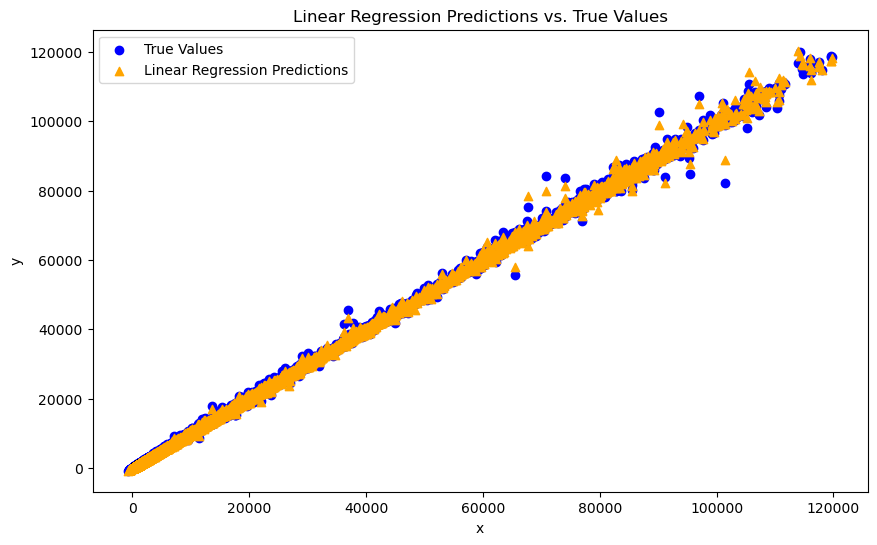

In [31]:
# Compare predictions using scatter plots
plt.figure(figsize=(10, 6))
# Scatter plot for Linear Regression
plt.scatter(X_test_selected[:,0], y_test, label='True Values', color='blue')
plt.scatter(X_test_selected[:,0], linearRegression_y_pred, label='Linear Regression Predictions', color='orange', marker='^')
plt.title('Linear Regression Predictions vs. True Values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


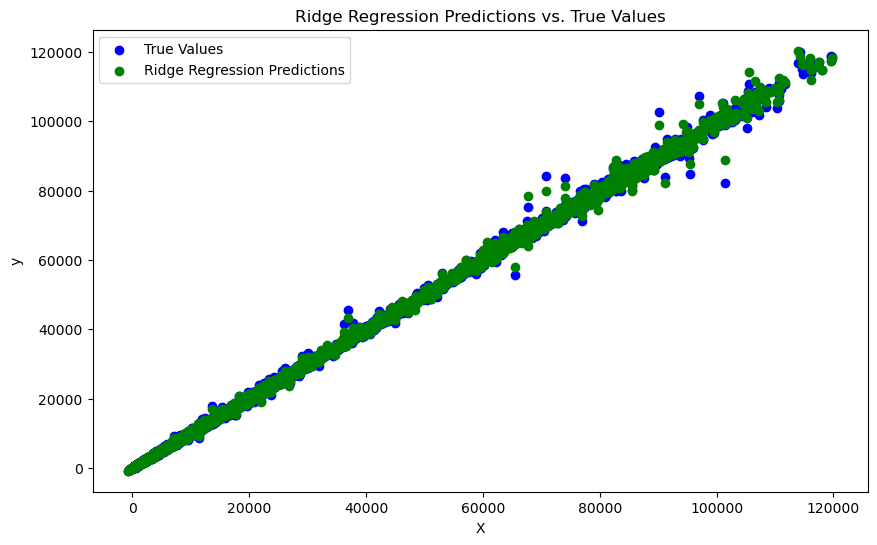

In [32]:

# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_selected[:,0], y_test, label='True Values', color='blue')
plt.scatter(X_test_selected[:,0], ridge_y_pred, label='Ridge Regression Predictions', color='green', marker='o')
plt.title('Ridge Regression Predictions vs. True Values')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

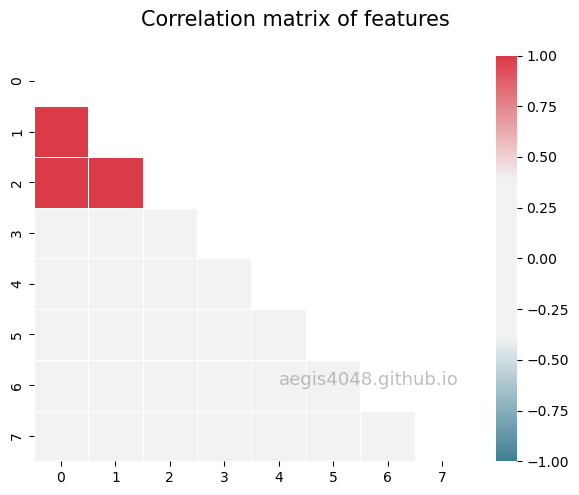

In [43]:

# Assuming X_train_selected is your feature matrix
# If X_train_selected is a DataFrame, you can use the .corr() method
# correlation_matrix = X_train_selected.corr(method='spearman')

# If X_train_selected is a NumPy array, use spearmanr directly
correlation_matrix, _ = spearmanr(X_train_selected)

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()
plt.show()


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = X_test_selected.reshape(-1,8)
Y = y_test

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y
x = x.flatten()
y = y.flatten()
z = z.flatten()
x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

#ols = linear_model.LinearRegression()
#model = ols.fit(X, Y)
#predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = linearRegressionModel.score(X, Y)

xx_pred = xx_pred.flatten()
yy_pred = yy_pred.flatten()
linearRegression_y_pred = linearRegression_y_pred.reshape(xx_pred.shape)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), linearRegression_y_pred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Porosity (%)', fontsize=12)
    ax.set_ylabel('Brittleness', fontsize=12)
    ax.set_zlabel('Gas Prod. (Mcf/day)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

ValueError: cannot reshape array of size 1934456 into shape (900,)

4513728
4513728
1934456


ValueError: x and y must be the same size

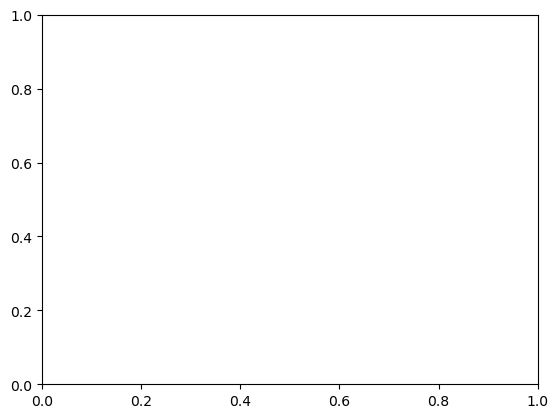

In [70]:
# Assuming you want to plot the predicted labels against one column from the train set
one_column_train_set = pd.DataFrame(x_train) # or X_test_selected['Month'].to_numpy()

print(len(one_column_train_set))
print(len(y_train))
print(len(linearRegression_y_pred))
# Create a scatter plot
plt.scatter(one_column_train_set, y_train, label='True Labels', color='blue')
plt.scatter(one_column_train_set, linearRegression_y_pred, label='Predicted Labels', color='red', marker='x')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Labels')
plt.title('True vs Predicted Labels')

# Add a legend
plt.legend()

# Show the plot
plt.show()
